**libraries**

In [112]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
import matplotlib.pyplot as plt


%matplotlib inline

In [113]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [114]:
data =pd.read_csv("/content/drive/MyDrive/datasets/fake-news/train.csv")

In [115]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [116]:
data.shape

(20800, 5)

In [117]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [118]:
data = data.fillna('')

In [119]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [120]:
data['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [121]:
data['content'] = data['author']+' '+data['title']

In [122]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [123]:
X = data['content']
y = data['label']

In [124]:
wordnet = WordNetLemmatizer()

In [125]:
# def stemming(content):
#     stemmed_content = re.sub('[^a-zA-Z]',' ',content)
#     stemmed_content = stemmed_content.lower()
#     stemmed_content = stemmed_content.split()
#     stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
#     stemmed_content = ' '.join(stemmed_content)
#     return stemmed_content

In [126]:
def lemmatize(content):
  words = re.sub('[^a-zA-Z]', ' ',content)
  words = words.lower()
  words = words.split()
  words = [wordnet.lemmatize(word) for word in words if not word in stopwords.words('english')]
  words = ' '.join(words)
  return words

In [127]:
data['content'] = data['content'].apply(lemmatize)

In [128]:
data['content']

0        darrell lucus house dem aide even see comey le...
1        daniel j flynn flynn hillary clinton big woman...
2                 consortiumnews com truth might get fired
3        jessica purkiss civilian killed single u airst...
4        howard portnoy iranian woman jailed fictional ...
                               ...                        
20795    jerome hudson rapper trump poster child white ...
20796    benjamin hoffman n f l playoff schedule matchu...
20797    michael j de la merced rachel abrams macy said...
20798    alex ansary nato russia hold parallel exercise...
20799                           david swanson keep f alive
Name: content, Length: 20800, dtype: object

In [129]:
X = data['content'].values
Y = data['label'].values

In [130]:
print(X.shape , y.shape)

(20800,) (20800,)


In [131]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()

In [132]:
X = vectorizer.fit_transform(X)

In [133]:
print(X)

  (0, 19361)	0.3898334584250517
  (0, 2995)	0.34215548056905637
  (0, 9676)	0.23066376406357905
  (0, 10711)	0.27186640212962043
  (0, 3567)	0.22972642932451354
  (0, 16636)	0.2434231886663421
  (0, 6290)	0.25787634753604916
  (0, 372)	0.27922090210909
  (0, 4706)	0.2800374370965301
  (0, 8757)	0.20553409740940168
  (0, 11060)	0.33838114561245775
  (0, 4440)	0.3349354477607908
  (1, 2311)	0.15792547179062308
  (1, 2694)	0.3733588177698612
  (1, 20677)	0.2647867528711059
  (1, 1843)	0.2991138596074481
  (1, 3384)	0.194274231709525
  (1, 8539)	0.19378614861132637
  (1, 7016)	0.726781854190952
  (1, 4403)	0.26939599285575333
  (2, 6879)	0.4651214075065619
  (2, 7568)	0.3412820420603414
  (2, 11859)	0.4717261145949637
  (2, 19276)	0.397654988300042
  (2, 3547)	0.30394939562160844
  :	:
  (20797, 885)	0.3049409287009706
  (20797, 1600)	0.33081174981720435
  (20797, 16242)	0.24487074231338238
  (20797, 18485)	0.30734974544622173
  (20797, 14928)	0.24487074231338238
  (20797, 11751)	0.2913959

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [135]:
print(X.shape, X_train.shape, X_test.shape)

(20800, 21030) (16640, 21030) (4160, 21030)


In [136]:
model = LogisticRegression()

In [137]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluation**

In [138]:
y_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train,y_pred)

In [139]:
print('train accuracy score : ', train_accuracy)

train accuracy score :  0.9868990384615385


In [140]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,y_pred)

In [141]:
print('test accuracy score : ', test_accuracy)

test accuracy score :  0.9776442307692308


**Confusion matrix**

In [142]:
confusion_matrix(Y_test,y_pred)

array([[1999,   78],
       [  15, 2068]])

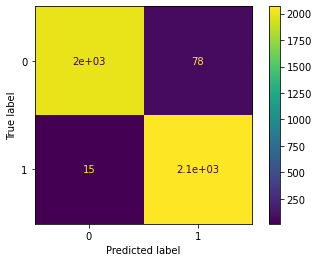

In [143]:
plot_confusion_matrix(model, X_test, Y_test)  
plt.show()

**cross validation scores**

In [144]:
cross_val_score(model, X_test, Y_test, cv=10, scoring = 'accuracy').mean()

0.9502403846153845

**classification report**

In [145]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.96      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



**making predictions using the test data**

In [167]:
print(Y_train[0])

0


In [168]:
test = X_train[0]

prediction = model.predict(test)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [97]:
# data1 =pd.read_csv("/content/drive/MyDrive/datasets/fake-news/train.csv")
# data1 = data.fillna('')
# data1['content'] = data1['author']+' '+data1['title']

In [102]:
# data1['content'][3]


'Jessica Purkiss 15 Civilians Killed In Single US Airstrike Have Been Identified'

In [111]:
# data1['label'][3]

1

**making predictions using real world text data**

In [174]:
def classify_message(text):
    text = vectorizer.transform(text)
    predicted = model.predict(text)
    probability = model.predict_proba(text).max()*100

    if predicted==0:
        print("not Fake news")
        print('the probability percentage is:',round(probability))
    else:
        print("The news is Fake")
        print('the probability percentage is:',round(probability))

test = ['Aaron Klein Obamaâ€™s Organizing for Action Partners with Soros-Linked â€˜Indivisibleâ€™ to Disrupt Trumpâ€™s Agenda']
classify_message(test)


not Fake news
the probability percentage is: 59
